# FLIP ROBO TECHNOLOGIES

# NAME: BIJAY PAREEK

# BATCH: DS2308

# Third-Phase-Practice-Projects--1-


# BANK MARKETING: 


# Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

# Business Use Case:

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

# Project Description:

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

# You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

# About The Dataset:

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



# You are provided with following 2 files:

# 1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

# 2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
# Dataset Attributes:

# Here is the description of all the variables:
•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign

# Output variable (desired target):

# •	Subscribed (target): has the client subscribed a term deposit? (YES/NO)






#  Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data:

In [3]:
train_data = pd.read_csv(r"C:/Users/raj/Downloads/termdeposit_train.csv")
test_data = pd.read_csv(r"C:/Users/raj/Downloads/termdeposit_test.csv")


In [4]:
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# checking missing values on train data:

In [6]:
print(train_data.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


## Note: There is no nan present in the train data we can go further for analysis:

# Data Exploration and Visualization

# Now we will  visualize the distribution on the train data


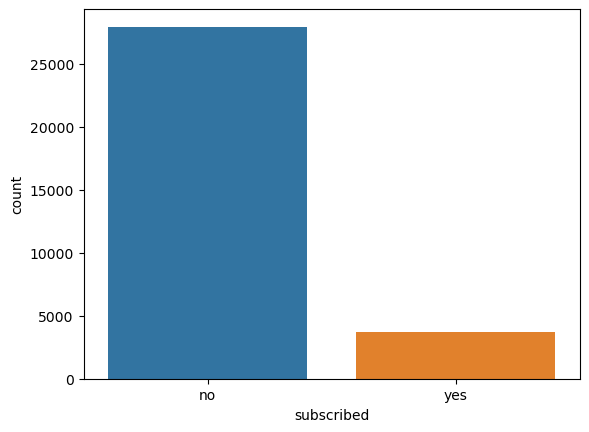

In [7]:
sns.countplot(x='subscribed', data=train_data)
plt.show()

# Separate features and target variable:

In [8]:
X = train_data.drop("subscribed", axis=1)
y = train_data["subscribed"]

In [9]:
X

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [10]:
y

0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object

# Split the data into training and validation sets:

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify numerical and categorical features:

In [12]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [14]:

# Create a preprocessor for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


#  Create a preprocessor for numerical and categorical features:

In [15]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [16]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor using ColumnTransformer:

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['ID', 'age', 'balance', 'day', 'duration',
                                  'campaign', 'pdays', 'previous']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'poutcome'])])

# Create the Random Forest Classifier model:

In [18]:
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

# Create the pipeline:

In [19]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


# Train the model:

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'age', 'balance',
                                                   'day', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                        

# Make predictions on the validation set:

In [21]:
y_pred = pipeline.predict(X_valid)
y_pred


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

# Evaluate the model:

In [22]:
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("Accuracy:", accuracy_score(y_valid, y_pred))


Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      5599
         yes       0.66      0.45      0.54       731

    accuracy                           0.91      6330
   macro avg       0.80      0.71      0.74      6330
weighted avg       0.90      0.91      0.90      6330

Confusion Matrix:
 [[5427  172]
 [ 399  332]]
Accuracy: 0.9097946287519747


# Make predictions on the test set:

In [23]:
test_predictions = pipeline.predict(test_data)
test_predictions

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

# Save predictions to a CSV file:

In [24]:
output = pd.DataFrame({'ID': test_data['ID'], 'subscribed': test_predictions})
output.to_csv('term_deposit_predictions.csv', index=False)

# Now we are going to see the subscribed (target): has the client subscribed a term deposit? (YES/NO):

In [25]:
# Read the saved CSV file
predictions_df = pd.read_csv('term_deposit_predictions.csv')

# Display the contents of the DataFrame
predictions_df

,ID,subscribed
0,38441,no
1,40403,no
2,3709,no
3,37422,no
4,12527,no
...,...,...
13559,23465,no
13560,11743,no
13561,28292,no
13562,45163,yes


#########################################################THANK YOU ##########################################################